In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report,roc_curve, auc

In [2]:
# Load the dataset
url ="https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs',
'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal',
'target']
data = pd.read_csv(url, header=None, names=column_names)

In [3]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())


First few rows of the dataset:
    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca thal  target  
0    3.0  0.0  6.0       0  
1    2.0  3.0  3.0       2  
2    2.0  2.0  7.0       1  
3    3.0  0.0  3.0       0  
4    1.0  0.0  3.0       0  


In [4]:
# Data Cleaning
# Replace '?' with NaN and convert the columns to numeric
data = data.replace('?', np.nan)
data = data.apply(pd.to_numeric)

In [5]:
# Check for missing values
print("\nMissing values in the dataset:")
print(data.isnull().sum())


Missing values in the dataset:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64


In [6]:
# Fill missing values with the median value of each column
data = data.fillna(data.median())

In [7]:
# Verify that there are no more missing values
print("\nMissing values after filling:")
print(data.isnull().sum())


Missing values after filling:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [8]:
# EDA
print("\nStatistical summary of the dataset:")
print(data.describe())


Statistical summary of the dataset:
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.689769  246.693069    0.148515   
std      9.038662    0.467299    0.960126   17.599748   51.776918    0.356198   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  241.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  275.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.990099  149.607261    0.326733    1.039604    1.600660    0.

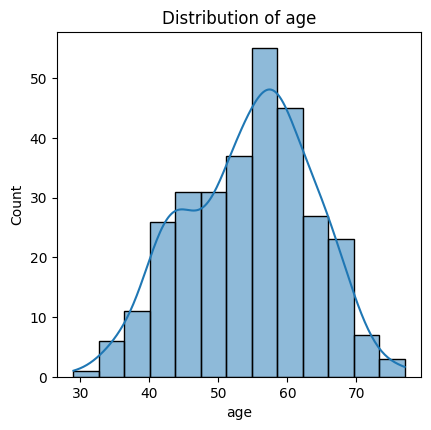

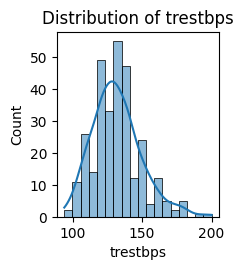

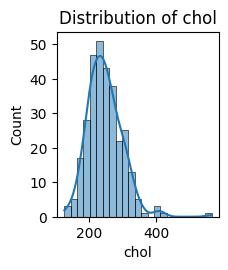

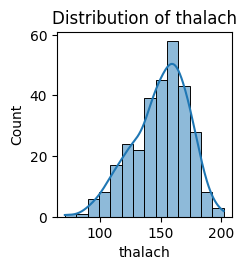

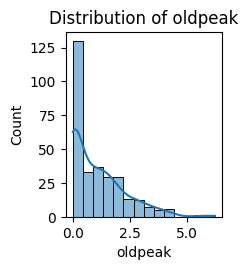

In [9]:
# Plotting distributions of numerical features
plt.figure(figsize=(12, 8))
for i, column in enumerate(['age', 'trestbps', 'chol', 'thalach','oldpeak'], 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.tight_layout()
    plt.show()

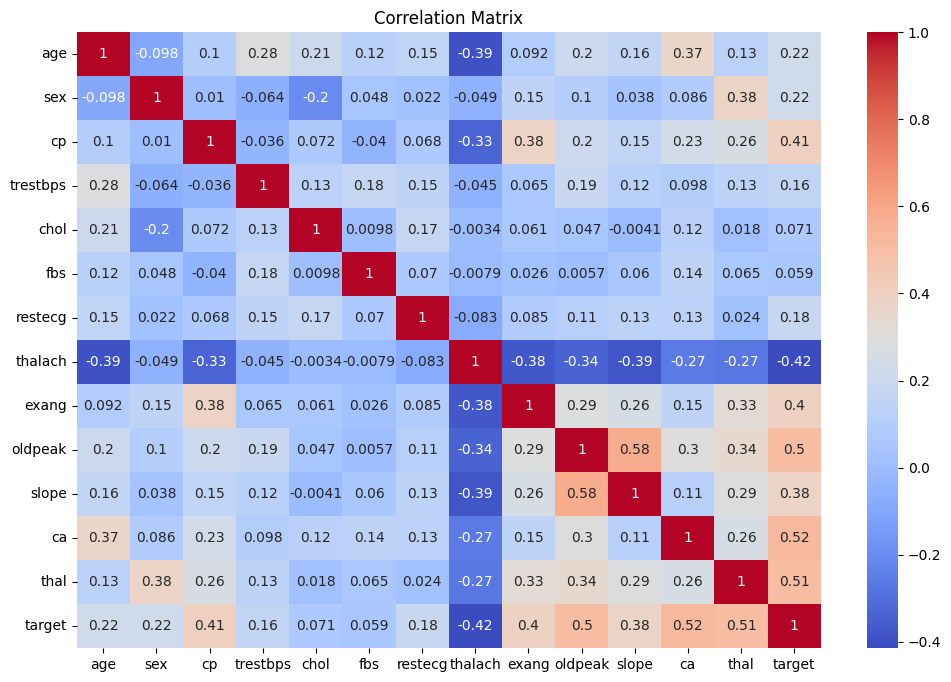

In [10]:
# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [11]:
# Data Preprocessing
# Split the data into features and target variable
X = data.drop('target', axis=1)
y = data['target']

In [12]:

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [13]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [14]:
# Model Training and Evaluation
models = {
'Logistic Regression': LogisticRegression(),
'Decision Tree': DecisionTreeClassifier(),
'Random Forest': RandomForestClassifier()
}


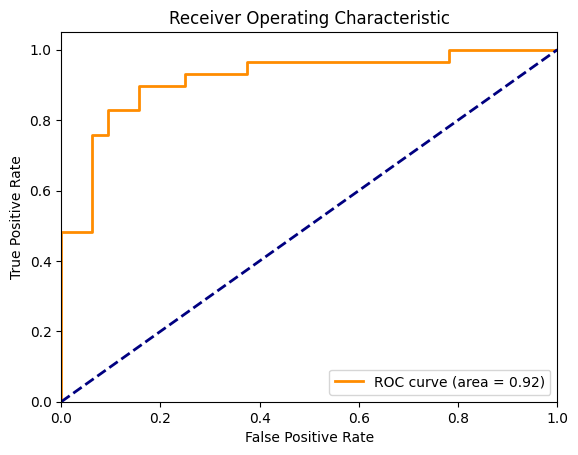

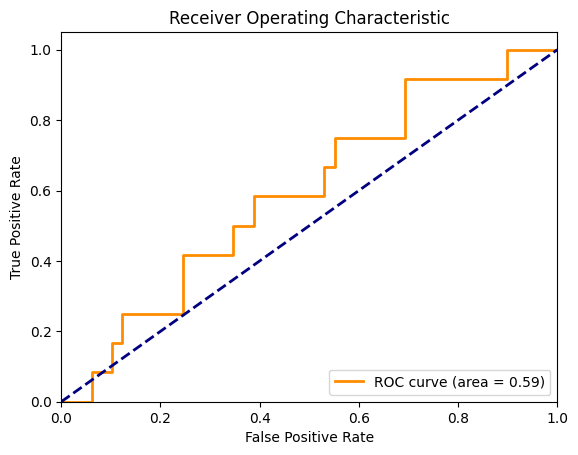

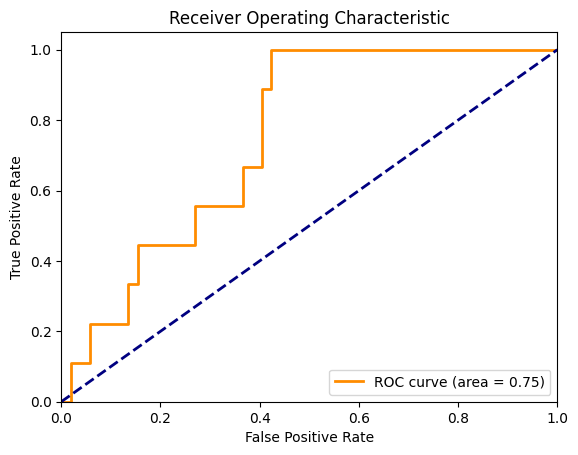

In [15]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import joblib

# Define and train the model (if not already trained and saved)
# If you have already trained the model, skip this part and load the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Alternatively, load the pre-trained model
# model = joblib.load('path_to_saved_model.pkl')

# Ensure your test data is ready
# X_test should be your feature matrix and y_test your true labels

# Example of getting ROC curve for a specific class
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

# Binarize the output for a multiclass setting
y_test_binary = label_binarize(y_test, classes=[0, 1, 2])  # Adjust classes as necessary

for i in range(y_test_binary.shape[1]):
    # Get the true binary labels for the current class
    y_test_binary_class = y_test_binary[:, i]

    # Get the predicted probabilities for the current class
    y_pred_proba_class = model.predict_proba(X_test)[:, i]

    # Compute the ROC curve and AUC for the current class
    fpr, tpr, _ = roc_curve(y_test_binary_class, y_pred_proba_class)
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()
